In [1]:
from pylab import *
%matplotlib inline

In [2]:
def rk4_a(ec,p_ini,x,args=0,h=0.001):
    if (x[1]-x[0]) <= 5.*h:
        h = (x[1]-x[0])/10
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    if args==0:
        for i in xrange(len(tiempos)-1):
            k1 = ec(sol[i,:],tiempos[i])
            k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h)
            k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h)
            k4 = ec(sol[i,:]+h*k3,tiempos[i]+h)
            sol[i+1,:] = sol[i,:] + (h/6.)*(k1+2*k2+2*k3+k4)
    else:
        for i in xrange(len(tiempos)-1):
            k1 = ec(sol[i,:],tiempos[i],args)
            k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h,args)
            k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h,args)
            k4 = ec(sol[i,:]+h*k3,tiempos[i]+h,args)
            sol[i+1,:] = sol[i,:] + (h/6.)*(k1+2*k2+2*k3+k4)

    return tiempos,sol

In [6]:
def mov(x_v,t,a_b_g):

    rpa = sqrt(x_v[0]**2 + (x_v[1]-a_b_g[0])**2)
    rpb = sqrt(x_v[0]**2 + (x_v[1]-a_b_g[1])**2)
    rpc = sqrt(x_v[0]**2 + (x_v[1]-a_b_g[2])**2)
    
    
    dxp,dyp = x_v[2],x_v[3]
    dvxp = a_b_g[3]*x_v[0]/(rpa**3) + a_b_g[3]*x_v[0]/(rpb**3)+ a_b_g[3]*x_v[0]/(rpc**3)
    dvyp = a_b_g[3]*(x_v[1]-a_b_g[0])/(rpa**3) + a_b_g[3]*(x_v[1]-a_b_g[1])/(rpb**3) + a_b_g[3]*(x_v[1]-a_b_g[2])/(rpc**3)
    
    return array([dxp,dyp,dvxp,dvyp])

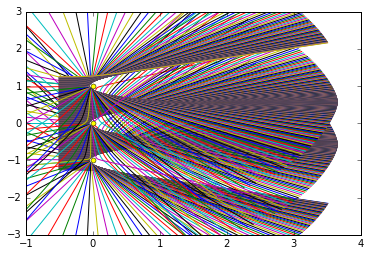

In [38]:
particulas = 1000
a_b_g = [0,-1,1,0.5]
med = 4
err = 5e-1
graph = zeros(particulas)
for i in arange(particulas):
    p_ini = [-0.5,((2.5/particulas)*i)-1.25,4,0]
    t,r = rk4_a(mov,p_ini,[0,1],a_b_g)
    
    
    plot(r[:,0],r[:,1])
plot([0],[a_b_g[0]],'o',color='yellow',markersize=5)
plot([0],[a_b_g[1]],'o',color='yellow',markersize=5)
plot([0],[a_b_g[2]],'o',color='yellow',markersize=5)
xlim(-1,4)
ylim(-3,3)
show()


In [24]:
def rutherford(p,a_b_g,N,pantalla):
    trayectoria = zeros((N,len(p)))
    trayectoria[0,:] = p
    mi_dt = .005
    n = 0
    pantalla2 = pantalla**2
    
    for i in range(N-1):
        t,sol_dt = rk4_a(mov,trayectoria[i,:],[0,mi_dt],a_b_g)
        if (sol_dt[-1,0]**2 + sol_dt[-1,1]**2) > pantalla2:
            dt_busqueda = mi_dt/2
            y_izq = trayectoria[i,:]
            t,sol = rk4_a(mov,trayectoria[i,:],[0,dt_busqueda],a_b_g)
            y_med = sol[-1,:]
            while abs((y_izq[0]**2 + y_izq[1]**2) - pantalla2) > 1e-2:
                if ((y_izq[0]**2 + y_izq[1]**2) - pantalla2)*((y_med[0]**2 + y_med[1]**2) - pantalla2) < 0:
                    reinicio = y_izq
                else:
                    reinicio = y_med
                dt_busqueda = dt_busqueda/2
                t,sol = rk4_a(mov,reinicio,[0,dt_busqueda],a_b_g)
                y_izq = reinicio
                y_med = sol[-1,:]
                trayectoria[i+1,:] = sol[-1,:]
            break
                
        else:
            trayectoria[i+1,:] = sol_dt[-1,:]
            n += 1 
    
    menos = N-n
    trayectoria = trayectoria[0:-menos]
    
    
    return trayectoria

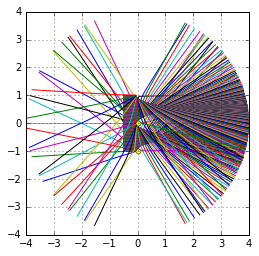

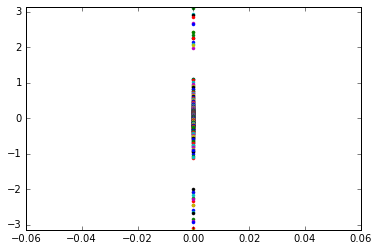

[  2.   0.   0.   2.   1.   0.   0.   2.   1.   0.   0.   2.   1.   1.   1.
   1.   1.   1.   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   2.   2.   1.   4.   3.   2.   3.   3.   4.   5.   6.   8.  12.
  16.  32.  61.  43.  27.  27.  43.  61.  32.  16.  12.   8.   6.   5.   4.
   3.   3.   2.   3.   4.   1.   2.   2.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   1.   1.   1.   1.   1.   1.   1.   2.   0.
   0.   0.   2.   0.   0.   1.   2.   0.   0.   1.]


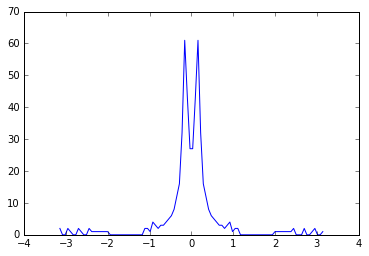

In [33]:
a_b_g = [0,-1,1,0.5]
particulas = 500
graph = zeros(particulas)
radio = 4

for i in range(particulas):
    p_ini = [-0.5,((2./particulas)*i)-1,4,0]
    trayectoria = rutherford(p_ini,a_b_g,300,radio)
    plot(trayectoria[:,0],trayectoria[:,1])
    if trayectoria[-1,0] > 0:
        graph[i] = arcsin(trayectoria[-1,1]/radio)
    elif trayectoria[-1,0] < 0 and trayectoria[-1,1] > 0:
        graph[i] = -arcsin(trayectoria[-1,1]/radio) + pi
        
    else:
        graph[i] = -arcsin(trayectoria[-1,1]/radio) - pi

plot([0],[a_b_g[0]],'o',color='yellow',markersize=5)
plot([0],[a_b_g[1]],'o',color='yellow',markersize=5)
xlim(-4,4)
ylim(-4,4)
grid(True)
axes().set_aspect('equal')
show()

for j in range(particulas):
    plot([0],graph[j],'.')
ylim(-pi,pi)
show()

division = 100
n = zeros(division)
for l in range(division):
    for ii in range(particulas):
        if (2*l*(pi/division))-pi <= graph[ii] <(2*(l+1)*(pi/division))-pi:
            n[l] += 1

        else:
            n[l] += 0
            
y = linspace(-pi,pi,division)
plot(y,n)
print n

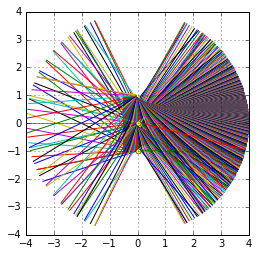

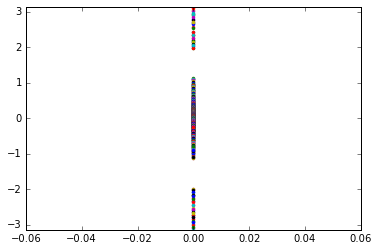

[   2.    2.    1.    3.    1.    2.    2.    2.    1.    2.    0.    2.
    3.    1.    1.    4.    1.    2.    2.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    4.    3.    3.    8.
    5.    6.    6.    6.    9.    9.   12.   16.   23.   33.   62.  121.
   87.   54.   54.   87.  121.   62.   33.   23.   16.   12.    9.    9.
    6.    6.    6.    5.    8.    3.    3.    4.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    2.    2.    1.
    4.    1.    1.    3.    2.    0.    2.    0.    2.    2.    2.    1.
    3.    1.    2.    1.]


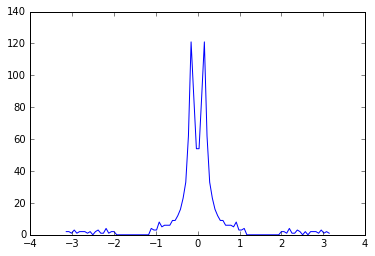

In [34]:
a_b_g = [0,-1,1,0.5]
particulas = 1000
graph = zeros(particulas)
radio = 4

for i in range(particulas):
    p_ini = [-0.5,((2./particulas)*i)-1,4,0]
    trayectoria = rutherford(p_ini,a_b_g,300,radio)
    plot(trayectoria[:,0],trayectoria[:,1])
    if trayectoria[-1,0] > 0:
        graph[i] = arcsin(trayectoria[-1,1]/radio)
    elif trayectoria[-1,0] < 0 and trayectoria[-1,1] > 0:
        graph[i] = -arcsin(trayectoria[-1,1]/radio) + pi
        
    else:
        graph[i] = -arcsin(trayectoria[-1,1]/radio) - pi

plot([0],[a_b_g[0]],'o',color='yellow',markersize=5)
plot([0],[a_b_g[1]],'o',color='yellow',markersize=5)
xlim(-4,4)
ylim(-4,4)
grid(True)
axes().set_aspect('equal')
show()

for j in range(particulas):
    plot([0],graph[j],'.')
ylim(-pi,pi)
show()

division = 100
n = zeros(division)
for l in range(division):
    for ii in range(particulas):
        if (2*l*(pi/division))-pi <= graph[ii] <(2*(l+1)*(pi/division))-pi:
            n[l] += 1

        else:
            n[l] += 0
            
y = linspace(-pi,pi,division)
plot(y,n)
print n

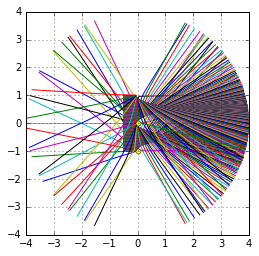

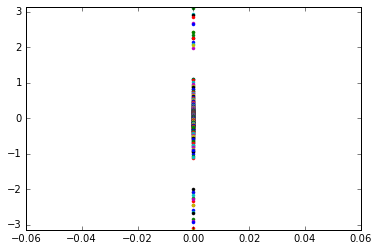

[  1.   1.   0.   0.   0.   0.   1.   1.   0.   1.   0.   0.   0.   0.   0.
   2.   0.   1.   0.   0.   0.   0.   2.   0.   0.   1.   0.   1.   1.   0.
   0.   1.   0.   1.   1.   0.   1.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   1.   1.   1.   1.   0.   1.   1.   3.   1.   2.   0.
   2.   1.   2.   1.   2.   2.   2.   3.   2.   3.   3.   4.   4.   5.   7.
   6.  10.  14.  18.  27.  34.  25.  18.  14.  13.  13.  14.  18.  25.  34.
  27.  18.  14.  10.   6.   7.   5.   4.   4.   3.   3.   2.   3.   2.   2.
   2.   1.   2.   1.   2.   0.   2.   1.   3.   1.   1.   0.   1.   1.   1.
   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.   0.
   1.   1.   0.   1.   0.   0.   1.   1.   0.   1.   0.   0.   2.   0.   0.
   0.   0.   0.   0.   2.   0.   0.   0.   0.   0.   1.   0.   1.   1.   0.
   0.   0.  

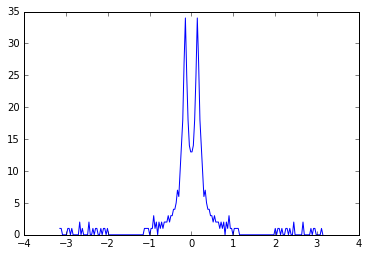

In [35]:
a_b_g = [0,-1,1,0.5]
particulas = 500
graph = zeros(particulas)
radio = 4

for i in range(particulas):
    p_ini = [-0.5,((2./particulas)*i)-1,4,0]
    trayectoria = rutherford(p_ini,a_b_g,300,radio)
    plot(trayectoria[:,0],trayectoria[:,1])
    if trayectoria[-1,0] > 0:
        graph[i] = arcsin(trayectoria[-1,1]/radio)
    elif trayectoria[-1,0] < 0 and trayectoria[-1,1] > 0:
        graph[i] = -arcsin(trayectoria[-1,1]/radio) + pi
        
    else:
        graph[i] = -arcsin(trayectoria[-1,1]/radio) - pi

plot([0],[a_b_g[0]],'o',color='yellow',markersize=5)
plot([0],[a_b_g[1]],'o',color='yellow',markersize=5)
xlim(-4,4)
ylim(-4,4)
grid(True)
axes().set_aspect('equal')
show()

for j in range(particulas):
    plot([0],graph[j],'.')
ylim(-pi,pi)
show()

division = 200
n = zeros(division)
for l in range(division):
    for ii in range(particulas):
        if (2*l*(pi/division))-pi <= graph[ii] <(2*(l+1)*(pi/division))-pi:
            n[l] += 1

        else:
            n[l] += 0
            
y = linspace(-pi,pi,division)
plot(y,n)
print n

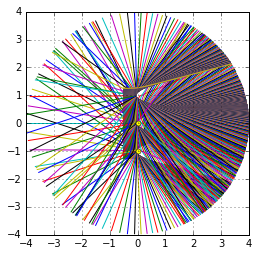

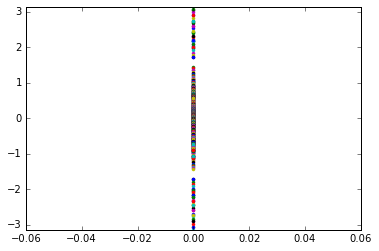

[  1.   2.   1.   2.   1.   0.   3.   1.   2.   1.   1.   3.   1.   2.   2.
   3.   2.   2.   2.   1.   1.   1.   2.   0.   0.   0.   0.   2.   2.   2.
   2.   2.   6.   6.   5.  12.   8.  12.  15.  20.  32.  13.   9.  14.  18.
  26.  49.  95.  71.  43.  43.  71.  95.  49.  26.  18.  14.   9.  12.  32.
  20.  15.  12.   8.  12.   5.   6.   6.   2.   2.   2.   2.   2.   0.   0.
   0.   0.   2.   1.   1.   1.   2.   2.   2.   3.   2.   2.   1.   3.   1.
   1.   2.   1.   3.   0.   1.   2.   1.   2.   0.]


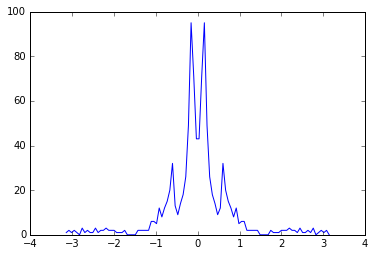

In [37]:
a_b_g = [0,-1,1,0.5]
particulas = 1000
graph = zeros(particulas)
radio = 4

for i in range(particulas):
    p_ini = [-0.5,((2.50/particulas)*i)-1.25,4,0]
    trayectoria = rutherford(p_ini,a_b_g,300,radio)
    plot(trayectoria[:,0],trayectoria[:,1])
    if trayectoria[-1,0] > 0:
        graph[i] = arcsin(trayectoria[-1,1]/radio)
    elif trayectoria[-1,0] < 0 and trayectoria[-1,1] > 0:
        graph[i] = -arcsin(trayectoria[-1,1]/radio) + pi
        
    else:
        graph[i] = -arcsin(trayectoria[-1,1]/radio) - pi

plot([0],[a_b_g[0]],'o',color='yellow',markersize=5)
plot([0],[a_b_g[1]],'o',color='yellow',markersize=5)
xlim(-4,4)
ylim(-4,4)
grid(True)
axes().set_aspect('equal')
show()

for j in range(particulas):
    plot([0],graph[j],'.')
ylim(-pi,pi)
show()

division = 100
n = zeros(division)
for l in range(division):
    for ii in range(particulas):
        if (2*l*(pi/division))-pi <= graph[ii] <(2*(l+1)*(pi/division))-pi:
            n[l] += 1

        else:
            n[l] += 0
            
y = linspace(-pi,pi,division)
plot(y,n)
print n

Aqui es una division grande=360, muchas partículas=1000 y radio=4

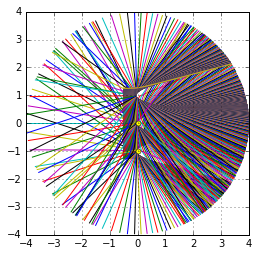

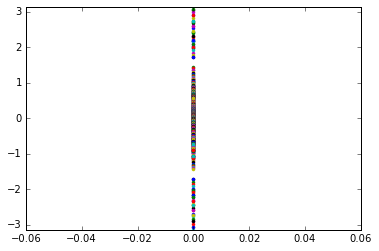

[  1.   0.   0.   0.   2.   0.   0.   0.   1.   0.   0.   0.   0.   1.   1.
   0.   0.   1.   0.   0.   0.   0.   1.   1.   1.   0.   1.   0.   0.   0.
   0.   1.   1.   0.   1.   0.   0.   0.   0.   1.   2.   1.   0.   0.   0.
   0.   2.   0.   1.   0.   0.   0.   1.   1.   0.   3.   0.   0.   0.   1.
   1.   0.   0.   1.   1.   1.   1.   0.   0.   0.   1.   0.   0.   0.   1.
   0.   0.   1.   0.   0.   0.   1.   1.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   1.   0.   1.   0.   1.   1.   0.   0.
   1.   1.   0.   0.   1.   1.   0.   1.   0.   1.   1.   2.   2.   1.   3.
   0.   2.   1.   2.   1.   2.   2.   4.   4.   2.   3.   3.   2.   3.   2.
   4.   3.   4.   6.   4.   5.   4.   6.   6.   7.   9.   9.  12.   3.   2.
   3.   2.   3.   3.   3.   2.   4.   4.   4.   5.   5.   6.   6.   7.   7.
  10.  11.  14.  17.  19.  27.  30.  28.  24.  19.  16.  14.  12.  12.  11.
  11.  12.  12.  14.  16.  19.  24.  28.  30.  27.  19.  17.  14.  11.  10.
   7.   7.  

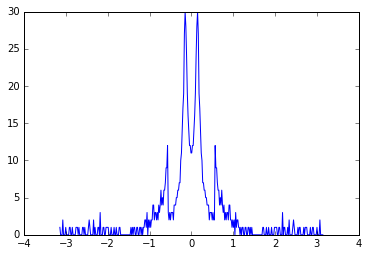

In [39]:
a_b_g = [0,-1,1,0.5]
particulas = 1000
graph = zeros(particulas)
radio = 4

for i in range(particulas):
    p_ini = [-0.5,((2.50/particulas)*i)-1.25,4,0]
    trayectoria = rutherford(p_ini,a_b_g,300,radio)
    plot(trayectoria[:,0],trayectoria[:,1])
    if trayectoria[-1,0] > 0:
        graph[i] = arcsin(trayectoria[-1,1]/radio)
    elif trayectoria[-1,0] < 0 and trayectoria[-1,1] > 0:
        graph[i] = -arcsin(trayectoria[-1,1]/radio) + pi
        
    else:
        graph[i] = -arcsin(trayectoria[-1,1]/radio) - pi

plot([0],[a_b_g[0]],'o',color='yellow',markersize=5)
plot([0],[a_b_g[1]],'o',color='yellow',markersize=5)
xlim(-4,4)
ylim(-4,4)
grid(True)
axes().set_aspect('equal')
show()

for j in range(particulas):
    plot([0],graph[j],'.')
ylim(-pi,pi)
show()

division = 360
n = zeros(division)
for l in range(division):
    for ii in range(particulas):
        if (2*l*(pi/division))-pi <= graph[ii] <(2*(l+1)*(pi/division))-pi:
            n[l] += 1

        else:
            n[l] += 0
            
y = linspace(-pi,pi,division)
plot(y,n)
print n

Aqui es una division grande=360, muchas partículas=1000 y radio=8

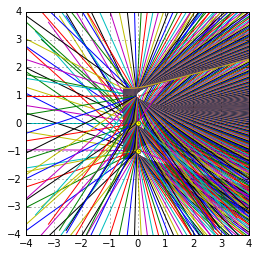

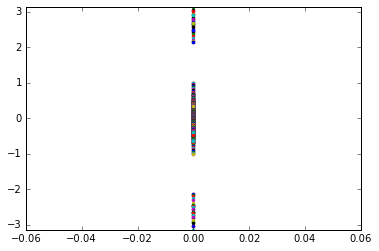

[  2.   0.   0.   0.   0.   1.   2.   0.   0.   0.   0.   1.   1.   2.   0.
   0.   1.   0.   1.   0.   2.   0.   1.   0.   2.   0.   2.   0.   3.   1.
   0.   0.   2.   0.   0.   0.   1.   0.   3.   0.   2.   0.   0.   1.   0.
   0.   0.   1.   0.   0.   0.   1.   0.   1.   0.   1.   0.   2.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   2.   1.   1.   1.   1.   0.   1.   1.   1.   1.   1.   0.   1.
   1.   1.   1.   1.   2.   4.   2.   3.   3.   4.   2.   3.   3.   3.   4.
   4.   6.   7.   8.   8.   7.   9.  10.  13.  13.   9.   5.   4.   5.   7.
   6.   8.   8.   9.  12.  14.  16.  21.  26.  31.  34.  34.  30.  26.  25.
  25.  26.  30.  34.  34.  31.  26.  21.  16.  14.  12.   9.   8.   8.   6.
   7.   5.  

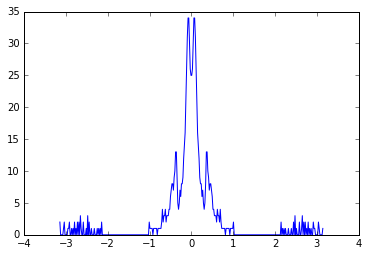

In [40]:
a_b_g = [0,-1,1,0.5]
particulas = 1000
graph = zeros(particulas)
radio = 8

for i in range(particulas):
    p_ini = [-0.5,((2.50/particulas)*i)-1.25,4,0]
    trayectoria = rutherford(p_ini,a_b_g,300,radio)
    plot(trayectoria[:,0],trayectoria[:,1])
    if trayectoria[-1,0] > 0:
        graph[i] = arcsin(trayectoria[-1,1]/radio)
    elif trayectoria[-1,0] < 0 and trayectoria[-1,1] > 0:
        graph[i] = -arcsin(trayectoria[-1,1]/radio) + pi
        
    else:
        graph[i] = -arcsin(trayectoria[-1,1]/radio) - pi

plot([0],[a_b_g[0]],'o',color='yellow',markersize=5)
plot([0],[a_b_g[1]],'o',color='yellow',markersize=5)
xlim(-4,4)
ylim(-4,4)
grid(True)
axes().set_aspect('equal')
show()

for j in range(particulas):
    plot([0],graph[j],'.')
ylim(-pi,pi)
show()

division = 360
n = zeros(division)
for l in range(division):
    for ii in range(particulas):
        if (2*l*(pi/division))-pi <= graph[ii] <(2*(l+1)*(pi/division))-pi:
            n[l] += 1

        else:
            n[l] += 0
            
y = linspace(-pi,pi,division)
plot(y,n)
print n

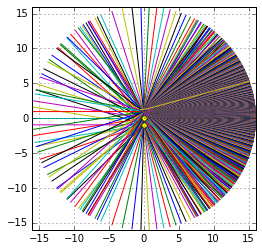

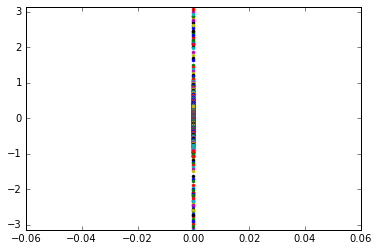

[  1.   0.   0.   1.   0.   1.   0.   0.   1.   0.   0.   0.   1.   0.   2.
   0.   0.   1.   0.   0.   0.   1.   0.   1.   0.   0.   1.   0.   0.   0.
   1.   1.   0.   0.   1.   0.   0.   0.   1.   1.   0.   2.   0.   0.   0.
   0.   2.   0.   1.   0.   0.   1.   0.   1.   1.   0.   2.   0.   1.   1.
   2.   0.   0.   1.   0.   1.   0.   1.   0.   0.   0.   0.   1.   0.   0.
   0.   0.   0.   1.   0.   0.   0.   1.   0.   0.   0.   1.   0.   0.   0.
   0.   0.   0.   0.   1.   0.   0.   1.   0.   0.   0.   1.   0.   0.   1.
   0.   1.   0.   0.   1.   0.   0.   1.   0.   1.   0.   0.   1.   2.   2.
   1.   1.   1.   2.   4.   1.   3.   2.   2.   3.   1.   2.   1.   3.   3.
   2.   2.   3.   3.   3.   2.   3.   3.   4.   2.   5.   4.   4.   4.   5.
   5.   6.   5.   6.   7.   8.   8.   9.  10.  11.  12.   5.   6.   6.   6.
   8.   9.   9.  11.  12.  13.  15.  17.  19.  21.  24.  24.  26.  27.  27.
  27.  27.  26.  24.  24.  21.  19.  17.  15.  13.  12.  11.   9.   9.   8.
   6.   6.  

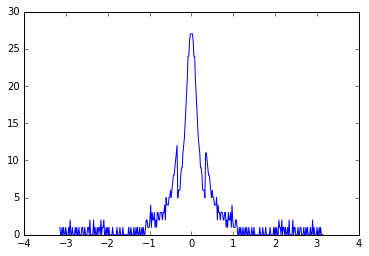

In [42]:
a_b_g = [0,-1,1,0.5]
particulas = 1000
graph = zeros(particulas)
radio = 16

for i in range(particulas):
    p_ini = [-0.5,((2.50/particulas)*i)-1.25,4,0]
    trayectoria = rutherford(p_ini,a_b_g,1200,radio)
    plot(trayectoria[:,0],trayectoria[:,1])
    if trayectoria[-1,0] > 0:
        graph[i] = arcsin(trayectoria[-1,1]/radio)
    elif trayectoria[-1,0] < 0 and trayectoria[-1,1] > 0:
        graph[i] = -arcsin(trayectoria[-1,1]/radio) + pi
        
    else:
        graph[i] = -arcsin(trayectoria[-1,1]/radio) - pi

plot([0],[a_b_g[0]],'o',color='yellow',markersize=5)
plot([0],[a_b_g[1]],'o',color='yellow',markersize=5)
xlim(-16,16)
ylim(-16,16)
grid(True)
axes().set_aspect('equal')
show()

for j in range(particulas):
    plot([0],graph[j],'.')
ylim(-pi,pi)
show()

division = 360
n = zeros(division)
for l in range(division):
    for ii in range(particulas):
        if (2*l*(pi/division))-pi <= graph[ii] <(2*(l+1)*(pi/division))-pi:
            n[l] += 1

        else:
            n[l] += 0
            
y = linspace(-pi,pi,division)
plot(y,n)
print n